In [3]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import matplotlib.pyplot as plt
import pandas as pd
import pickle
sns.set()

In [4]:
ls ../save_models

cache_data/  codebert/  summarize/  summarize#summarize/  train.log


In [5]:
pth = '../save_models/summarize/'

In [6]:
lang, model = 'java/', 'graphcodebert'  # codebert roberta graphcodebert unixcoder

In [7]:
data_path = pth + lang  + model + "/" + 'cache_data/'

In [62]:
data_path

'../save_models/summarize/java/graphcodebert/cache_data/'

In [134]:
pickle_suffix = {1:{1:".pickle",0:"_ft_sa.pickle"},0:{1:"_at_ua.pickle",0:"_at_sa.pickle"}}
#pickle_suffix=args.pickle_suffix[args.frequent_type][args.pickle_suffix]
pickle_suffix

{1: {1: '.pickle', 0: '_ft_sa.pickle'},
 0: {1: '_at_ua.pickle', 0: '_at_sa.pickle'}}

In [137]:
import copy
pickle_suffix = {1:{1:".pickle",0:"_ft_sa.pickle"},0:{1:"_at_ua.pickle",0:"_at_sa.pickle"}}
#pickle_suffix=args.pickle_suffix[args.frequent_type][args.pickle_suffix]
attention_list_ = copy.deepcopy(pickle_suffix)
attention_list_[0][0]=[np.array(1),np.array([1,2])]
pickle_suffix

{1: {1: '.pickle', 0: '_ft_sa.pickle'},
 0: {1: '_at_ua.pickle', 0: '_at_sa.pickle'}}

# Combine att plot

In [31]:
import copy
pickle_suffix = {1:{1:".pickle",0:"_ft_sa.pickle"},0:{1:"_at_ua.pickle",0:"_at_sa.pickle"}}
labels_dict ={1:{1:'Frequent Types',0:'freq type & standard ast'},0:{1:'All Types',0:'all type & standard ast'}}
#pickle_suffix=args.pickle_suffix[args.frequent_type][args.pickle_suffix]
attention_list = copy.deepcopy(pickle_suffix)
attention_list_1d = copy.deepcopy(pickle_suffix)
r=0
for ft in [0,1]:
    for ua in [1]:
        attention_list[ft][ua]=pickle.load(open(data_path + "/attention_list"+pickle_suffix[ft][ua], "rb"))
        attention_1d=[]
        for i in attention_list[ft][ua]:
            attention_1d.extend(list(i.reshape(-1)))
        attention_1d=np.array(attention_1d)
        attention_list_1d[ft][ua]=attention_1d
        if r==0:
            list_and=attention_list_1d[ft][ua]
            lables = [labels_dict[ft][ua]]*len(attention_list_1d[ft][ua])
            assert(len(list_and)==len(lables))
            r=1
        else:
            list_and = np.concatenate([list_and,attention_list_1d[ft][ua]])
            lables += [labels_dict[ft][ua]]*len(attention_list_1d[ft][ua])
            assert(len(list_and)==len(lables))
d = {'score':list_and,'from':lables}
att_and = pd.DataFrame(d)

In [ ]:
plot=sns.displot(att_and, x="score", hue="from", aspect=1.5)
plot.ax.set_yscale('log')
plot.fig.suptitle("Attention Frequency Distribution")
plt.xlabel('Attention')
plt.ylabel('Frequency')
plot.set(xlim=(0, 0.2))
#plot.set(xticks=(range(0,0.2,20)))
plot.set(ylim=(0, 100000))
plot.tight_layout()
plot.savefig('../'+'attention_frequency_distribution.pdf', dpi=300,format="pdf", bbox_inches="tight")
#temporarily not used in paper

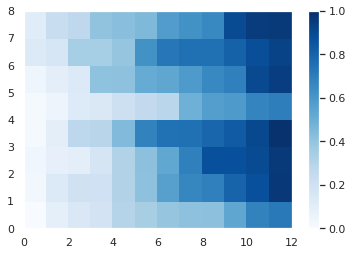

In [37]:
import numpy as np
import matplotlib.pyplot as plt    

np.random.seed(1)
data =  np.sort(np.random.rand(8,12))
plt.figure()
c = plt.pcolor(data, linewidths=4, cmap='Blues', vmin=0.0, vmax=1.0)
plt.colorbar(c)
plt.show()

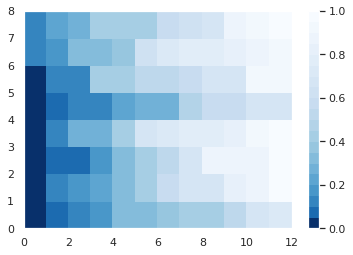

In [59]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib        as mpl

x=np.linspace(0,1,20)
x=x**0.5
cmap = mpl.cm.Blues_r(x)
cmap = mpl.colors.ListedColormap(cmap[:,:-1])

np.random.seed(1)
data = np.sort(np.random.rand(8,12))

plt.figure()
c = plt.pcolor(data,  linewidths=4, cmap=cmap, vmin=0.0, vmax=1.0)
plt.colorbar(c)
plt.show()

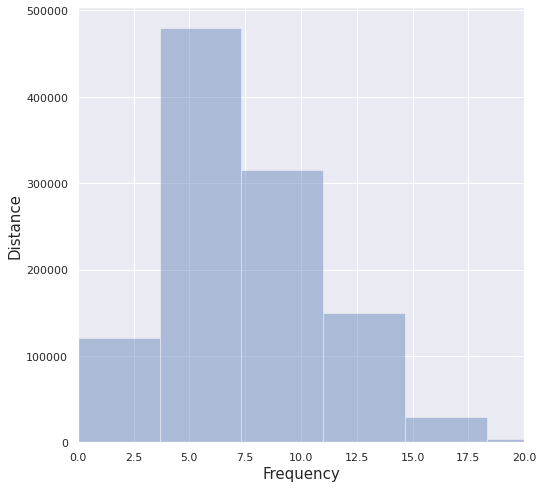

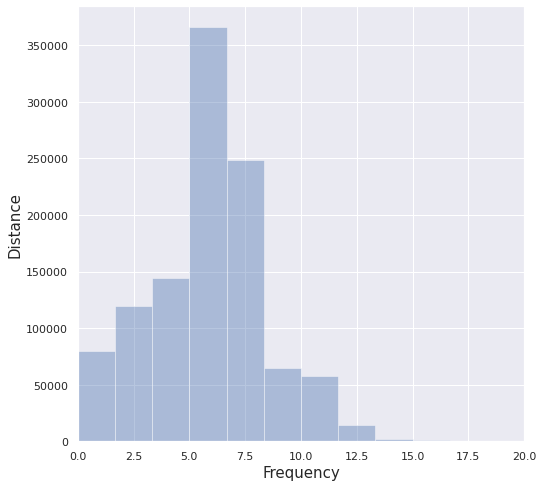

In [30]:
import copy
pickle_suffix = {1:{1:".pickle",0:"_ft_sa.pickle"},0:{1:"_at_ua.pickle",0:"_at_sa.pickle"}}
labels_dict ={1:{1:'Frequent Types & Upgraded AST',0:'Frequent Types & Standard AST'},
              0:{1:'All Types & Upgraded AST',0:'All Types & Standard AST'}}
#pickle_suffix=args.pickle_suffix[args.frequent_type][args.pickle_suffix]
distance_list = copy.deepcopy(pickle_suffix)
distance_list_1d = copy.deepcopy(pickle_suffix)
for ft in [1]:
    for ua in [0,1]:
        distance_list[ft][ua]=pickle.load(open(data_path + "/distance_list"+pickle_suffix[ft][ua], "rb"))
        distance_1d=[]
        for i in distance_list[ft][ua]:
            distance_1d.extend(list(i.reshape(-1)))
        distance_1d=np.array(distance_1d)
        distance_list_1d[ft][ua]=distance_1d
        plt.figure(figsize=(8,8))
        plt.hist(distance_list_1d[ft][ua], bins=12, alpha=.4)
        plt.xlabel('Frequency',fontsize=15)
        plt.ylabel('Distance',fontsize=15)
        plt.xlim((0, 20))
        #plt.title('Distance Frequency Distribution ('+labels_dict[ft][ua]+')')
        plt.savefig('../'+'distance_frequency_barplot'+pickle_suffix[ft][ua][:-7]+'.pdf', dpi=300,format="pdf", bbox_inches="tight")
        plt.show()

In [69]:
lang, model = 'python/', 'codebert'
data_path = pth + lang  + model + "/" + 'cache_data/'
data_path
attention_list_ft_nd = pickle.load(open(data_path + 'attention_list.pickle', "rb"))
attention_list_ft_nd_1d=[]
for i in attention_list:
    #print(type(i))
    attention_list_ft_nd_1d.extend(list(i.reshape(-1)))
attention_list_ft_nd_1d=np.array(attention_list_ft_nd_1d)

<Figure size 1152x1440 with 0 Axes>

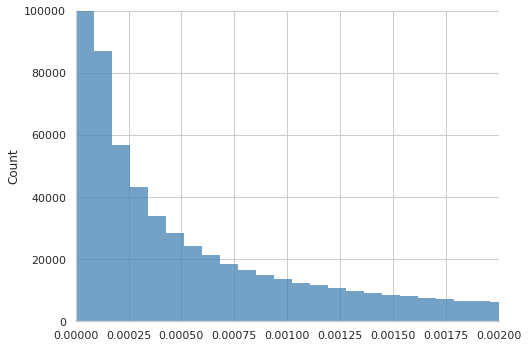

In [99]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(16,20))
    plot=sns.displot(attention_list_ft_nd_1d, aspect=1.5,color='#4682b4')
                
#     plot.fig.suptitle("attention_distribution")
    plot.set(xlim=(0, 0.002))
    plot.set(ylim=(0, 100000))
    plot.tight_layout()
    plot.savefig('./'+'attention_distribution_case.pdf', dpi=300,format="pdf", bbox_inches="tight")
    #plot.savefig(data_path+model+'attention_distribution_ft_nd.png', dpi=300,format="pdf", bbox_inches="tight")

In [74]:
lang, model = 'python/', 'codebert'
data_path = pth + lang  + model + "/" + 'cache_data/'
data_path
distance_list_ft_nd = pickle.load(open(data_path + 'distance_list.pickle', "rb"))
distance_list_ft_nd_1d=[]
for i in distance_list_ft_nd:
    #print(type(i))
    distance_list_ft_nd_1d.extend(list(i.reshape(-1)))
distance_list_ft_nd_1d=np.array(distance_list_ft_nd_1d)

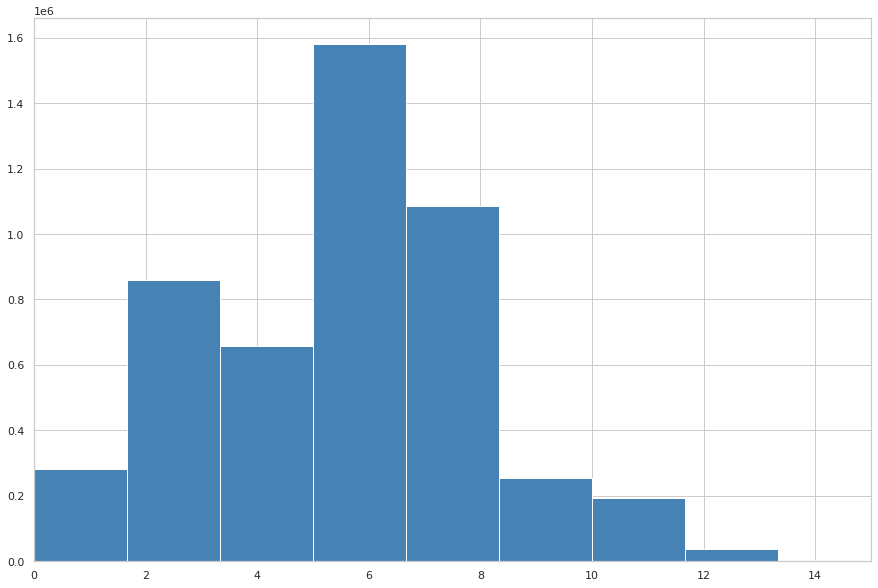

In [109]:
import copy
pickle_suffix = {1:{1:".pickle",0:"_ft_sa.pickle"},0:{1:"_at_ua.pickle",0:"_at_sa.pickle"}}
labels_dict ={1:{1:'Frequent Types & Upgraded AST',0:'Frequent Types & Standard AST'},
              0:{1:'All Types & Upgraded AST',0:'All Types & Standard AST'}}
#pickle_suffix=args.pickle_suffix[args.frequent_type][args.pickle_suffix]
distance_list = copy.deepcopy(pickle_suffix)
distance_list_1d = copy.deepcopy(pickle_suffix)
for ft in [1]:
    for ua in [1]:
        distance_list[ft][ua]=pickle.load(open(data_path + "/distance_list"+pickle_suffix[ft][ua], "rb"))
        distance_1d=[]
        for i in distance_list[ft][ua]:
            distance_1d.extend(list(i.reshape(-1)))
        distance_1d=np.array(distance_1d)
        distance_list_1d[ft][ua]=distance_1d
        
        #sns.set(rc={'figure.figsize':(16,20)})
        with sns.axes_style("whitegrid"):
            plt.subplots(figsize=(15,10))
            plt.hist(distance_list_1d[ft][ua], bins=12,color='#4682b4')
#             plt.xlabel('Frequency',fontsize=15)
#             plt.ylabel('Distance',fontsize=15)
            plt.xlim((0, 15))
            #plt.title('Distance Frequency Distribution ('+labels_dict[ft][ua]+')')
            plt.savefig('./'+'distance_frequency_barplot_case'+pickle_suffix[ft][ua][:-7]+'.pdf', dpi=300,format="pdf", bbox_inches="tight")
            plt.show()

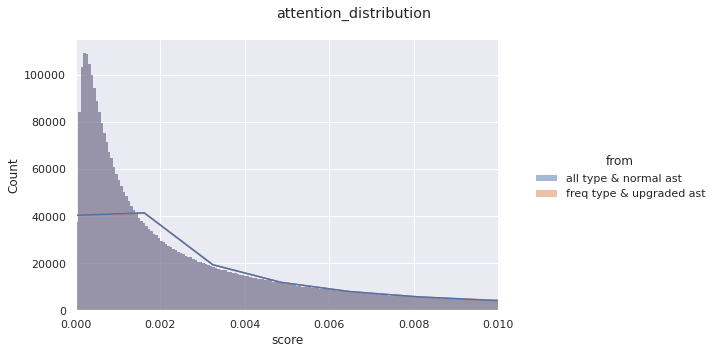

In [109]:
list_and = np.concatenate([attention_list_1d,attention_list_ft_nd_1d])
lables = ['all type & standard ast']*len(attention_list_1d)+['freq type & upgraded ast']*len(attention_list_ft_nd_1d)
d = {'score':list_and,'from':lables}
att_and = pd.DataFrame(d)
plot=sns.displot(att_and, x="score",kde=True, hue="from", aspect=1.5)
plot.fig.suptitle("attention_distribution")
plot.set(xlim=(0, 0.01))
plot.tight_layout()
plot.savefig('./'+'attention_distribution.pdf', dpi=300,format="pdf", bbox_inches="tight")

# frequent_type=1 upgraded_ast=1

In [80]:
attention_list = pickle.load(open(data_path + 'attention_list_only_frequent_type.pickle', "rb"))
distance_list = pickle.load(open(data_path + 'distance_list_only_frequent_type.pickle', "rb"))
tokens_list = pickle.load(open(data_path + 'tokens_list_only_frequent_type.pickle', "rb"))

In [81]:
len(attention_list[0])

25

In [82]:
attention_list_1d=[]
for i in attention_list:
    attention_list_1d.extend(list(i.reshape(-1)))

In [83]:
distance_list_1d=[]
for i in distance_list:
    distance_list_1d.extend(list(i.reshape(-1)))

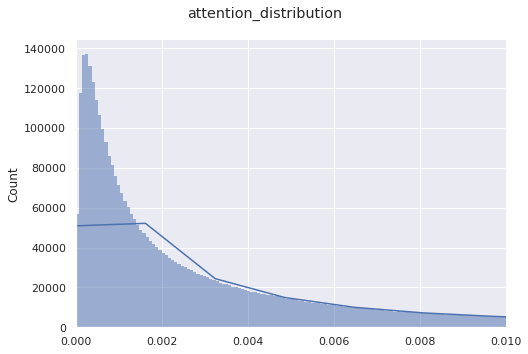

In [84]:
plot=sns.displot(attention_list_1d,kde=True, aspect=1.5)

plot.fig.suptitle("attention_distribution")
plot.set(xlim=(0, 0.01))
plot.tight_layout()
plot.savefig(data_path+model+'attention_distribution_ft_nd.png', dpi=300,format="pdf", bbox_inches="tight")

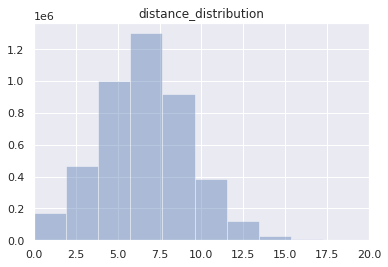

<Figure size 432x288 with 0 Axes>

In [85]:
plt.hist(distance_list_1d, bins=12, alpha=.4)
plt.xlim((0, 20))
plt.title('distance_distribution')
plt.show()
plt.savefig(data_path+model+'distance_barplot_ft_nd.png', dpi=300,format="pdf", bbox_inches="tight")

# frequent_type=1 upgraded_ast=0

In [61]:
attention_list = pickle.load(open(data_path + 'attention_list_only_frequent_type.pickle', "rb"))
distance_list = pickle.load(open(data_path + 'distance_list_only_frequent_type.pickle', "rb"))
tokens_list = pickle.load(open(data_path + 'tokens_list_only_frequent_type.pickle', "rb"))

In [62]:
len(attention_list[0])

25

In [63]:
attention_list_1d=[]
for i in attention_list:
    attention_list_1d.extend(list(i.reshape(-1)))

In [64]:
distance_list_1d=[]
for i in distance_list:
    distance_list_1d.extend(list(i.reshape(-1)))

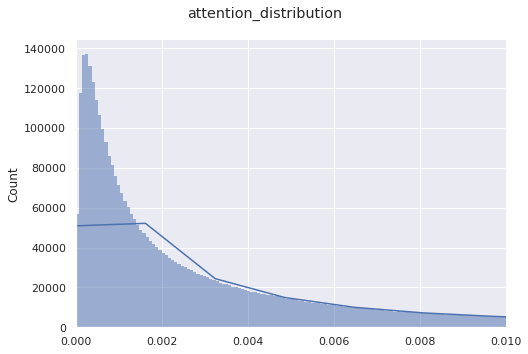

In [65]:
plot=sns.displot(attention_list_1d,kde=True, aspect=1.5)

plot.fig.suptitle("attention_distribution")
plot.set(xlim=(0, 0.01))
plot.tight_layout()
plot.savefig(data_path+model+'attention_distribution_ft.png', dpi=300,format="pdf", bbox_inches="tight")

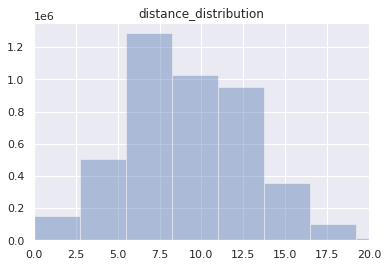

<Figure size 432x288 with 0 Axes>

In [66]:
plt.hist(distance_list_1d, bins=12, alpha=.4)
plt.xlim((0, 20))
plt.title('distance_distribution')
plt.show()
plt.savefig(data_path+model+'distance_barplot_ft.png', dpi=300,format="pdf", bbox_inches="tight")